In [63]:
import numpy as np
import os 
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
pip install opencv-python


   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 330.3 kB/s eta 0:01:57
   ---------------------------------------- 0.0/38.6 MB 330.3 kB/s eta 0:01:57
   ---------------------------------------- 0.0/38.6 MB 330.3 kB/s eta 0:01:57
   ---------------------------------------- 0.0/38.6 MB 330.3 kB/s eta 0:01:57
   ---------------------------------------- 0.1/38.6 MB 193.2 kB/s eta 0:03:20
   ---------------------------------------- 0.1/38.6 MB 206.9 kB/s eta 0:03:07
   ---------------------------------------- 0.1/38.6 MB 267.9 kB/s eta 0:02:24
   ---------------------------------------- 0.1/38.6 MB 300.4 kB/s eta 0:02:09
   ---------------------------------------- 0.1/38.6 MB 300.4 kB/s eta 0:02:09
   ---------------------------------------- 0.1/38.6 MB 275.0 kB/s eta 0:02:20
   ---------------------------------------- 0.2/38.6 MB 327.8 kB/s eta

In [24]:
def load_images(directory=''):
    images = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp')):
                path = os.path.join(root, file)
                image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
                if image is not None:
                    images.append(image)
    return images

In [25]:
images_TULIP = load_images("D:/6th_Semester/AI_lab/flowers/tulip")
images_sunflower=load_images("D:/6th_Semester/AI_lab/flowers/sunflower")
images_rose=load_images("D:/6th_Semester/AI_lab/flowers/rose")
images_dendilion=load_images("D:/6th_Semester/AI_lab/flowers/dandelion")
images_daisy=load_images("D:/6th_Semester/AI_lab/flowers/daisy")

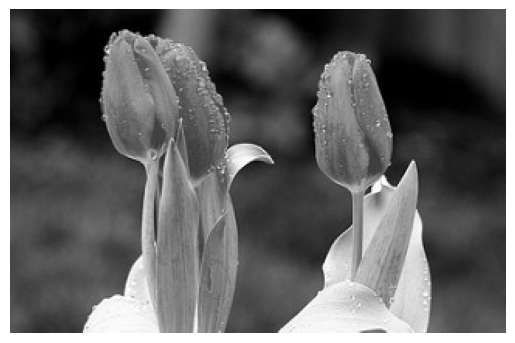

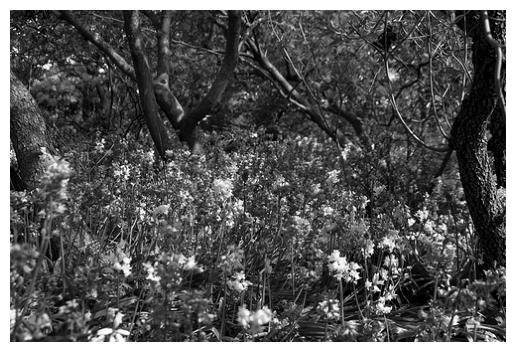

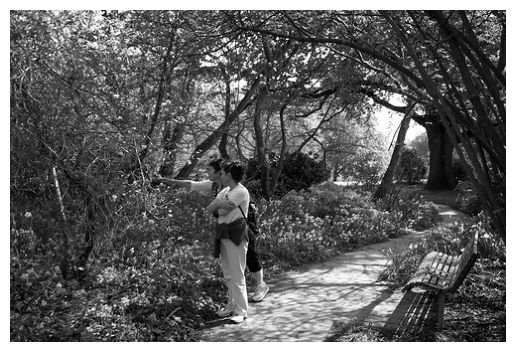

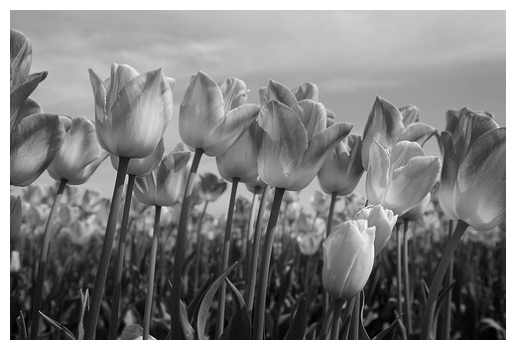

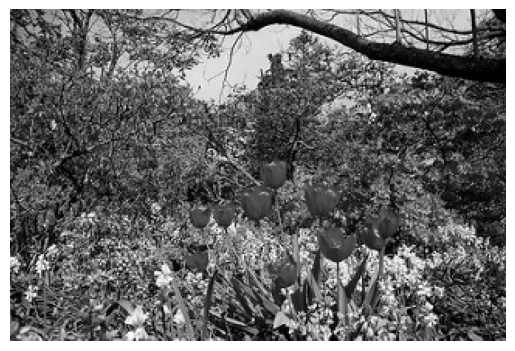

In [26]:
for img in images_TULIP[:5]:
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.show()

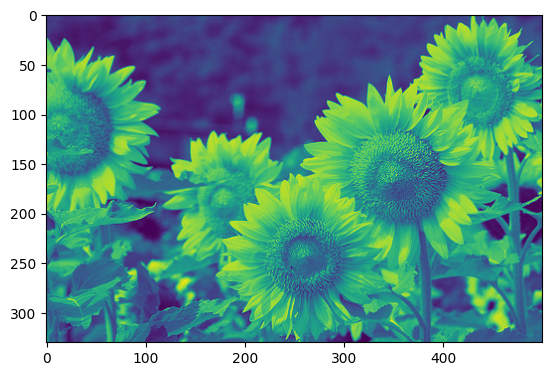

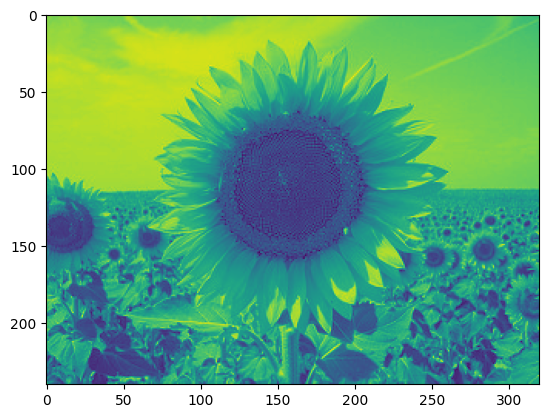

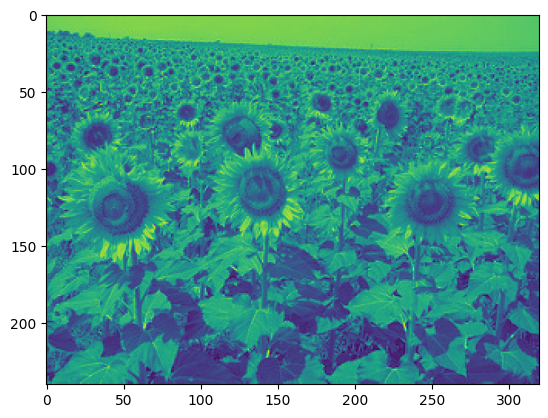

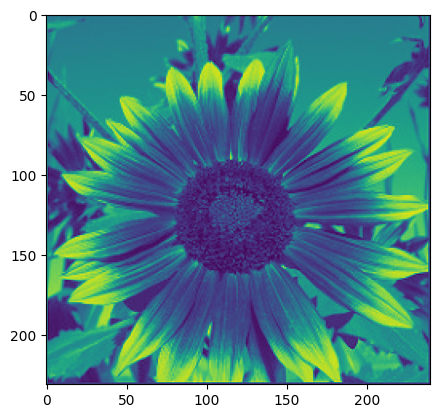

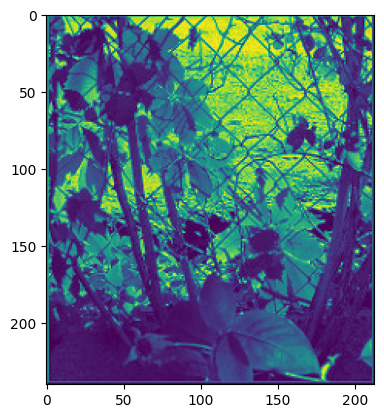

In [27]:
for img in images_sunflower[:5]:
    plt.imshow(img)
    plt.show()

In [ ]:
for img in images_rose[:5]:
    plt.imshow(img)
    plt.show()

In [ ]:
for img in images_dendilion[:5]:
    plt.imshow(img)
    plt.show()

In [ ]:
for img in images_daisy[:5]:
    plt.imshow(img)
    plt.show()

# Preprocess

In [28]:
combined_images = []
combined_images.extend(images_TULIP)
combined_images.extend(images_sunflower)
combined_images.extend(images_rose)
combined_images.extend(images_dendilion)
combined_images.extend(images_daisy)
scaled_images = [image.astype(np.float32) / 255.0 for image in combined_images]

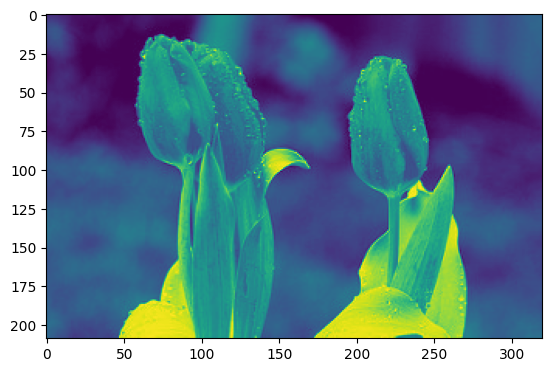

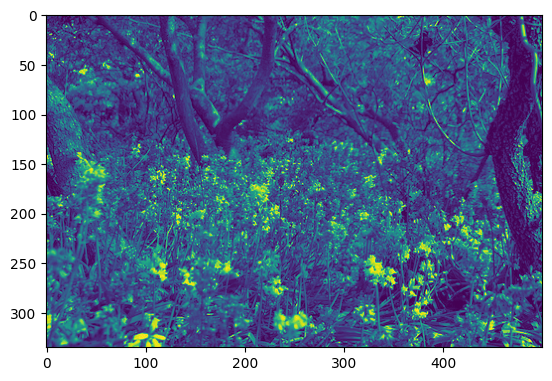

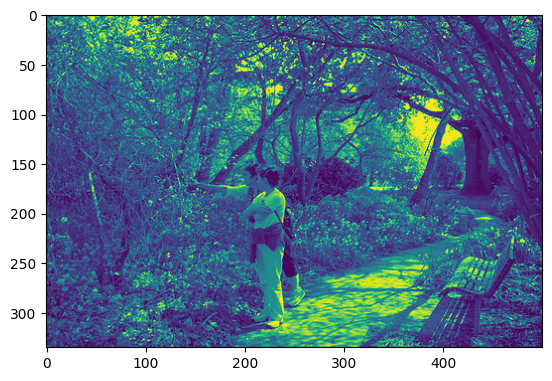

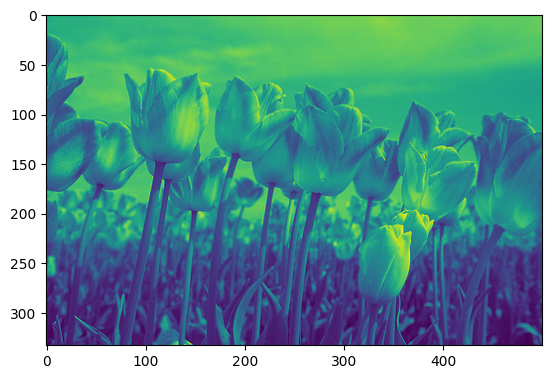

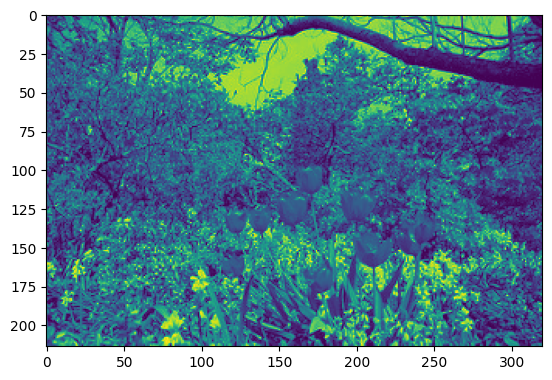

In [31]:
for img in scaled_images[:5]:
    plt.imshow(img)
    plt.show()

# Split Data Set 

In [34]:

train_images, test_images = train_test_split(scaled_images, test_size=0.2, random_state=42)
train_images, val_images = train_test_split(train_images, test_size=0.25, random_state=42) 
print("Number of training images:", len(train_images))
print("Number of validation images:", len(val_images))
print("Number of testing images:", len(test_images))

Number of training images: 2589
Number of validation images: 864
Number of testing images: 864


#  weights and biases 

In [49]:
def initialize_parameters(layer_dims):
    parameters = {}
    np.random.seed(42) 
    for l in range(1, len(layer_dims)):
        parameters['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * 0.01
        parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))
    return parameters

In [36]:
input_size = 64 * 64
hidden_size1 = 128
hidden_size2 = 64
output_size = 5

In [37]:
layer_dims = [input_size, hidden_size1, hidden_size2, output_size] 
parameters = initialize_parameters(layer_dims) 

# Labels 

In [110]:
from sklearn.preprocessing import LabelEncoder
classes = ['rose', 'tulip', 'sunflower', 'dandelion', 'daisy']
label_encoder = LabelEncoder()
Y = label_encoder.fit_transform(classes)
original_classes = label_encoder.inverse_transform(Y)


# Forwod Pass

In [111]:
def forward_propagation(X, parameters):
    caches = []
    A = X
    
    for l in range(1, len(parameters) // 2):
        W = parameters['W' + str(l)]
        b = parameters['b' + str(l)]
        Z = np.dot(W, A) + b
        A = np.maximum(0, Z)  
        caches.append((A, Z))
    ZL = np.dot(parameters['W' + str(len(parameters) // 2)], A) + parameters['b' + str(len(parameters) // 2)]
    AL = 1 / (1 + np.exp(-ZL)) 
    caches.append((AL,))
    
    return AL, caches


In [112]:
desired_height = 64
desired_width = 64
train_images_resized = [np.resize(image, (desired_height, desired_width)) for image in train_images]
train_images_array = np.array(train_images_resized)
input_size = desired_height * desired_width
train_images_flat = train_images_array.reshape(train_images_array.shape[0], -1).T



In [113]:
AL, caches = forward_propagation(train_images_flat, parameters)


# gradient of the loss

In [114]:
def compute_gradients(AL, Y, caches, parameters):
    gradients = {}
    L = len(caches)
    m = AL.shape[1]
    epsilon = 1e-8
    dAL = - (np.divide(Y, AL + epsilon) - np.divide(1 - Y, 1 - AL + epsilon))
    dZL = AL - Y
    gradients[f'dA{L}'] = dAL
    gradients[f'dZ{L}'] = dZL
    gradients[f'dW{L}'] = 1 / m * np.dot(dZL, caches[L-1][0].T)
    gradients[f'db{L}'] = 1 / m * np.sum(dZL, axis=1, keepdims=True)
    for l in reversed(range(L-1)):
        dA_prev = np.dot(parameters[f'W{l+1}'].T, dZ)
        dZ = np.multiply(dA_prev, np.int64(caches[l][1] > 0))
        gradients[f'dA{l+1}'] = dA_prev
        gradients[f'dZ{l+1}'] = dZ
        gradients[f'dW{l+1}'] = 1 / m * np.dot(dZ, caches[l][0].T)
        gradients[f'db{l+1}'] = 1 / m * np.sum(dZ, axis=1, keepdims=True)
    
    return gradients




In [ ]:
encoder = OneHotEncoder()
Y_one_hot = encoder.fit_transform(original_classes.reshape(-1, 1)).toarray()
num_samples = AL.shape[0]
Y_reshaped = Y_one_hot[:, :num_samples]
Y_transposed = Y_reshaped

# Compute gradients using backward propagation
gradients = compute_gradients(AL, Y_transposed, caches, parameters)


# Update 

In [108]:
def update_parameters(parameters, gradients, learning_rate):
    return {k: v - learning_rate * gradients[k] for k, v in parameters.items() if k.startswith('W') or k.startswith('b')}
parameters = update_parameters(parameters, gradients, learning_rate=0.01)



# Accuracy :


In [109]:
def compute_accuracy(X, Y, parameters):
    AL, _ = forward_propagation(X, parameters)
    predictions = (AL > 0.5).astype(int)
    accuracy = np.mean(predictions == Y)

    return accuracy


In [61]:
num_epochs = 10
learning_rate = 0.01
train_accuracies = []
val_accuracies = []
for epoch in range(num_epochs):
    AL, caches = forward_propagation(train_images_flat, parameters)
    gradients = compute_gradients(AL, Y_transposed, caches, parameters)
    train_accuracy = compute_accuracy(train_images_flat,  Y_transposed, parameters)
    train_accuracies.append(train_accuracy)
    gradients = compute_gradients(AL, Y_transposed, caches, parameters)
    parameters = update_parameters(parameters, gradients, learning_rate)
    val_accuracy = compute_accuracy(val_set_x, val_set_y, parameters)
    val_accuracies.append(val_accuracy)
    print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {train_loss}, Training Accuracy: {train_accuracy}')
    print(f'Epoch {epoch+1}/{num_epochs}, Validation Accuracy: {val_accuracy}')
plt.plot(range(1, num_epochs+1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, num_epochs+1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracies')
plt.legend()
plt.show()



Shape of Y_one_hot: (5, 5)


# Evaluate 

In [ ]:
from sklearn.metrics import classification_report
test_accuracy = compute_accuracy(X_test, Y_test, parameters)
print("Test Accuracy:", test_accuracy)
test_predictions, _ = forward_propagation(X_test, parameters)
report = classification_report(Y_test.squeeze(), test_predictions.squeeze().round(), target_names=["Class 0", "Class 1", "Class 2", "Class 3", "Class 4"])
print("Classification Report:")
print(report)


# PLot 

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(Y_test[i], test_predictions[i])
    roc_auc[i] = auc(fpr[i], tpr[i])
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()
